In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score, f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
class ProbabilisticNeuralNetwork:
    def __init__(self, num_input_neurons, num_abstraction_classes, sigma=1.0):
        self.num_input_neurons = num_input_neurons
        self.num_abstraction_classes = num_abstraction_classes
        self.sigma = sigma  
        self.class_labels = None
        self.training_data = None

    def train(self, training_data, abstraction_labels):
        self.training_data = training_data
        self.class_labels = np.unique(abstraction_labels)

    def gaussian(self, x, prototype):
        return np.exp(-0.5 * np.sum((x - prototype)**2) / (self.sigma**2))

    def pattern_layer(self, input_vector):
        activations = np.array([np.sum([self.gaussian(input_vector, data_point) for data_point in self.training_data[y_train == class_label]]) for class_label in self.class_labels])
        return activations

    def output_layer(self, input_vector):
        pattern_activations = self.pattern_layer(input_vector)
        exp_activations = np.exp(pattern_activations)
        output_probs = exp_activations / np.sum(exp_activations)
        return output_probs


In [3]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fraction_to_keep = 0.01  

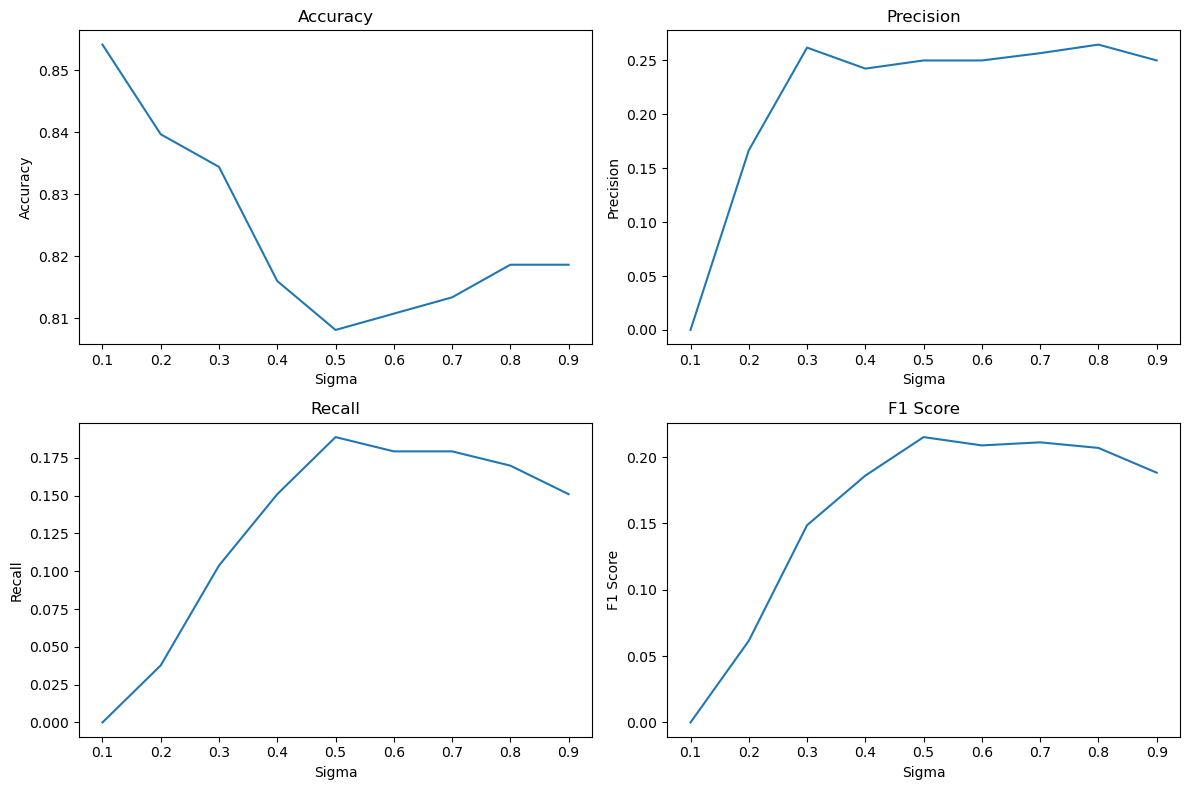

In [4]:
X_sampled, _, y_sampled, _ = train_test_split(X_scaled, y, test_size=1-fraction_to_keep, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42)

sigma_values = np.arange(0.1, 1, 0.1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for sigma in sigma_values:
    pnn = ProbabilisticNeuralNetwork(num_input_neurons=X_train.shape[1], num_abstraction_classes=2, sigma=sigma)
    pnn.train(X_train, y_train)

    predictions = []

    for input_vector in X_test:
        output_probs = pnn.output_layer(input_vector)
        predicted_class = np.argmax(output_probs) 
        predictions.append(predicted_class)

    predictions = np.array(predictions)

    accuracy = accuracy_score(y_test.values, predictions)
    precision = precision_score(y_test.values, predictions)
    recall = recall_score(y_test.values, predictions)
    f1 = f1_score(y_test.values, predictions)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(sigma_values, accuracy_scores)
plt.title('Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(sigma_values, precision_scores)
plt.title('Precision')
plt.xlabel('Sigma')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.plot(sigma_values, recall_scores)
plt.title('Recall')
plt.xlabel('Sigma')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(sigma_values, f1_scores)
plt.title('F1 Score')
plt.xlabel('Sigma')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


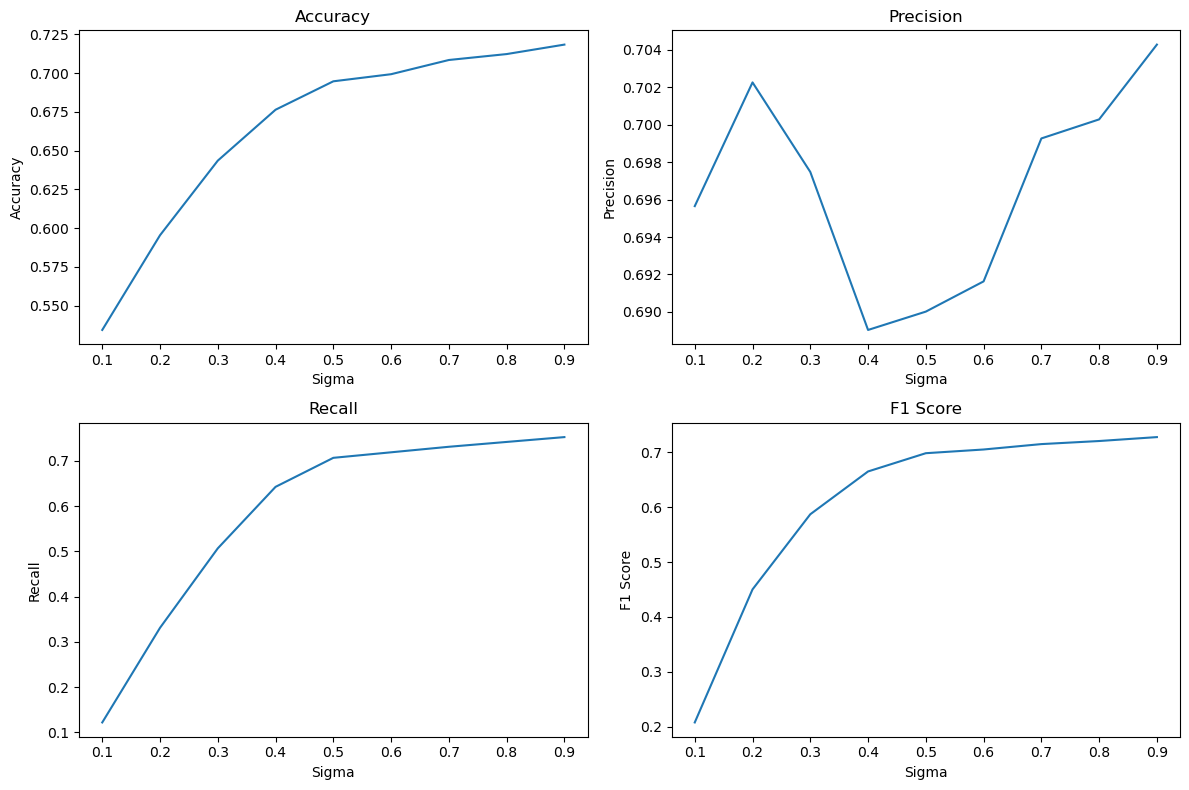

In [5]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_sampled, _, y_sampled, _ = train_test_split(X_resampled, y_resampled, test_size=1-fraction_to_keep, stratify=y_resampled, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42)
sigma_values = np.arange(0.1, 1, 0.1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for sigma in sigma_values:
    pnn = ProbabilisticNeuralNetwork(num_input_neurons=X_train.shape[1], num_abstraction_classes=2, sigma=sigma)
    pnn.train(X_train, y_train)

    predictions = []

    for input_vector in X_test:
        output_probs = pnn.output_layer(input_vector)
        predicted_class = np.argmax(output_probs) 
        predictions.append(predicted_class)

    predictions = np.array(predictions)

    accuracy = accuracy_score(y_test.values, predictions)
    precision = precision_score(y_test.values, predictions)
    recall = recall_score(y_test.values, predictions)
    f1 = f1_score(y_test.values, predictions)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(sigma_values, accuracy_scores)
plt.title('Accuracy')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(sigma_values, precision_scores)
plt.title('Precision')
plt.xlabel('Sigma')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.plot(sigma_values, recall_scores)
plt.title('Recall')
plt.xlabel('Sigma')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(sigma_values, f1_scores)
plt.title('F1 Score')
plt.xlabel('Sigma')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()